In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib
import numpy as np

In [2]:
# load models

lin_int_model = joblib.load('models/splitted_linear_int_Dictionary_model.sav')
ridge_int_model = joblib.load('models/splitted_ridge_int_Dictionary_model.sav')
lasso_int_model = joblib.load('models/splitted_lasso_int_Dictionary_model.sav')
boost_int_model = joblib.load('models/splitted_boost_int_Dictionary_model.sav')


In [3]:
# load test data
int_data = joblib.load('data/splitted_int_Dictionary_train_data.sav')
ohe_data = int_data.drop(labels=['TABLE_NAME', 'COLUMN_NAME'], axis=1)
ohe_data = pd.get_dummies(ohe_data, columns=['SCAN_TYPE', 'DATA_TYPE', 'ENCODING'])
ohe_data.head()

,INPUT_ROWS,OUTPUT_ROWS,RUNTIME_NS,ROW_COUNT,MAX_CHUNK_SIZE,SELECTIVITY,SCAN_TYPE_COLUMN_SCAN,DATA_TYPE_int,ENCODING_Dictionary
1744,700000,349449,188197486,700000,1000,0.499213,1,1,1
1741,700000,559544,177078036,700000,1000,0.799349,1,1,1
1356,500000,449331,146636602,500000,1000,0.898662,1,1,1
1362,500000,150211,102694800,500000,1000,0.300422,1,1,1
783,200000,119990,49054110,200000,1000,0.599950,1,1,1


In [4]:
int_real_y = ohe_data[['RUNTIME_NS']]
int_data = ohe_data.drop(labels=['RUNTIME_NS'], axis=1)
lin_pred_y = lin_int_model.predict(int_data)
lasso_pred_y = lasso_int_model.predict(int_data)
ridge_pred_y = ridge_int_model.predict(int_data)
boost_pred_y = boost_int_model.predict(int_data)


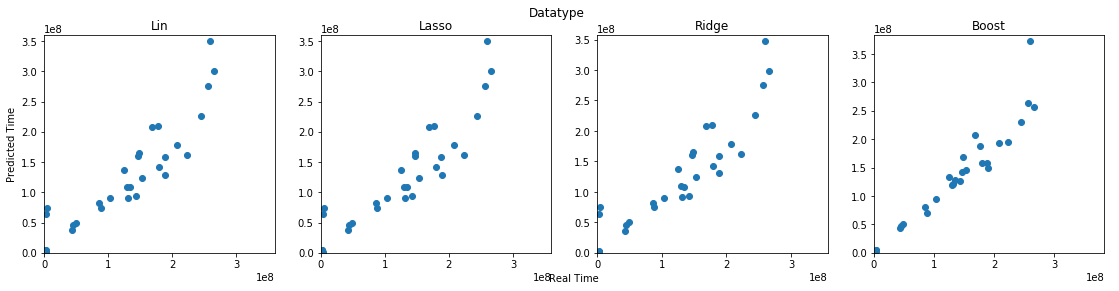

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(19,4))
fig.suptitle('Datatype')

axs[0].scatter(int_real_y, lin_pred_y)
axs[0].set_title('Lin')
axs[0].set_ylim([0, max(np.amax(lin_pred_y), np.amax(int_real_y.to_numpy())) + 10000000])
axs[0].set_xlim([0, max(np.amax(lin_pred_y), np.amax(int_real_y.to_numpy())) + 10000000])
#axs[0,0].set_ylim([0, max(np.amax(float_pred_y), np.amax(float_real_y.to_numpy())) + 10000000])
#axs[0,0].set_xlim([0, max(np.amax(float_pred_y), np.amax(float_real_y.to_numpy())) + 10000000])
axs[1].scatter(int_real_y, lasso_pred_y)
axs[1].set_title('Lasso')
axs[1].set_ylim([0, max(np.amax(lasso_pred_y), np.amax(int_real_y.to_numpy())) + 10000000])
axs[1].set_xlim([0, max(np.amax(lasso_pred_y), np.amax(int_real_y.to_numpy())) + 10000000])
#axs[0,1].scatter(int_real_y, int_pred_y)
#axs[0,1].set_title('Int')
#axs[0,1].set_ylim([0, max(np.amax(int_pred_y), np.amax(int_real_y.to_numpy())) + 10000000])
#axs[0,1].set_xlim([0, max(np.amax(int_pred_y), np.amax(int_real_y.to_numpy())) + 10000000])
axs[2].scatter(int_real_y, ridge_pred_y)
axs[2].set_title('Ridge')
axs[2].set_ylim([0, max(np.amax(ridge_pred_y), np.amax(int_real_y.to_numpy())) + 10000000])
axs[2].set_xlim([0, max(np.amax(ridge_pred_y), np.amax(int_real_y.to_numpy())) + 10000000])
axs[3].scatter(int_real_y, boost_pred_y)
axs[3].set_title('Boost')
axs[3].set_ylim([0, max(np.amax(boost_pred_y), np.amax(int_real_y.to_numpy())) + 10000000])
axs[3].set_xlim([0, max(np.amax(boost_pred_y), np.amax(int_real_y.to_numpy())) + 10000000])
#axs[0,2].scatter(string_real_y, string_pred_y)
#axs[0,2].set_title('String')
#axs[0,2].set_ylim([0, max(np.amax(string_pred_y), np.amax(string_real_y.to_numpy())) + 10000000])
#axs[0,2].set_xlim([0, max(np.amax(string_pred_y), np.amax(string_real_y.to_numpy())) + 10000000])
#axs[1,2].scatter(string_real_y, string_pred_y)
#axs[1,2].set_title('String')
# max_y = max(max(np.amax(float_pred_y), np.amax(int_pred_y)), np.amax(string_pred_y))
# max_x = max(max(np.amax(float_real_y.to_numpy()), np.amax(int_real_y.to_numpy())), np.amax(string_real_y.to_numpy()))
# max_scale = max(max_x, max_y)


# for labels
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Real Time")
plt.ylabel("Predicted Time")
plt.show()